#　Section9 特徴量エンジニアリング

In [1]:
import pandas as pd
import seaborn as sns

## 日付

In [2]:
df = pd.read_csv('bike_share.csv')

In [3]:
df.head()

datetime  season  holiday  workingday  weather  temp   atemp  \
0  2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1  2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2  2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3  2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4  2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  
0        81        0.0       3          13     16  
1        80        0.0       8          32     40  
2        80        0.0       5          27     32  
3        75        0.0       3          10     13  
4        75        0.0       0           1      1

In [4]:
# datetimeはobject、つまり文字列型で入っている
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [5]:
type(df['datetime'].iloc[0])

str

In [6]:
# 日付型に変更
df['datetime'] = pd.to_datetime(df['datetime'])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [8]:
# 日付関連の記法
df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month
df['dayofyear'] = df['datetime'].dt.dayofyear
df['dayofweek'] = df['datetime'].dt.dayofweek  # 曜日
df['weekofyear'] = df['datetime'].dt.isocalendar().week  #　isocalendarを使う際は月曜から週が始まるという考え方。2011-01-02は2010年の52週目
df['quarter'] = df['datetime'].dt.quarter
df['leap_year'] = df['datetime'].dt.is_leap_year  # 閏年かを判定する関数

In [9]:
df[30:80]

datetime  season  holiday  workingday  weather   temp   atemp  \
30 2011-01-02 07:00:00       1        0           0        2  16.40  20.455   
31 2011-01-02 08:00:00       1        0           0        3  16.40  20.455   
32 2011-01-02 09:00:00       1        0           0        2  15.58  19.695   
33 2011-01-02 10:00:00       1        0           0        2  14.76  17.425   
34 2011-01-02 11:00:00       1        0           0        2  14.76  16.665   
35 2011-01-02 12:00:00       1        0           0        2  14.76  16.665   
36 2011-01-02 13:00:00       1        0           0        2  14.76  17.425   
37 2011-01-02 14:00:00       1        0           0        3  14.76  17.425   
38 2011-01-02 15:00:00       1        0           0        3  13.94  16.665   
39 2011-01-02 16:00:00       1        0           0        3  13.94  16.665   
40 2011-01-02 17:00:00       1        0           0        1  13.94  16.665   
41 2011-01-02 18:00:00       1        0           0        2  14.76  16.665   
42 2011-01-02 19:00:00       1        0           0        1  13.12  14.395   
43 2011-01-02 20:00:00       1        0           0        1  12.30  13.635   
44 2011-01-02 21:00:00       1        0           0        1  10.66  11.365   
45 2011-01-02 22:00:00       1        0           0        1   9.84  10.605   
46 2011-01-02 23:00:00       1        0           0        1   9.02  11.365   
47 2011-01-03 00:00:00       1        0           1        1   9.02   9.850   
48 2011-01-03 01:00:00       1        0           1        1   8.20   8.335   
49 2011-01-03 04:00:00       1        0           1        1   6.56   6.820   
50 2011-01-03 05:00:00       1        0           1        1   6.56   6.820   
51 2011-01-03 06:00:00       1        0           1        1   5.74   5.305   
52 2011-01-03 07:00:00       1        0           1        1   5.74   6.820   
53 2011-01-03 08:00:00       1        0           1        1   5.74   6.060   
54 2011-01-03 09:00:00       1        0           1        1   6.56   6.820   
55 2011-01-03 10:00:00       1        0           1        1   7.38   8.335   
56 2011-01-03 11:00:00       1        0           1        1   8.20   9.090   
57 2011-01-03 12:00:00       1        0           1        1   9.02  10.605   
58 2011-01-03 13:00:00       1        0           1        1   9.84  10.605   
59 2011-01-03 14:00:00       1        0           1        1  10.66  12.120   
60 2011-01-03 15:00:00       1        0           1        1  10.66  12.120   
61 2011-01-03 16:00:00       1        0           1        1  10.66  12.120   
62 2011-01-03 17:00:00       1        0           1        1   9.84  11.365   
63 2011-01-03 18:00:00       1        0           1        1   9.84  12.880   
64 2011-01-03 19:00:00       1        0           1        1   8.20  12.880   
65 2011-01-03 20:00:00       1        0           1        1   8.20  11.365   
66 2011-01-03 21:00:00       1        0           1        1   7.38   9.850   
67 2011-01-03 22:00:00       1        0           1        1   5.74   7.575   
68 2011-01-03 23:00:00       1        0           1        1   7.38  10.605   
69 2011-01-04 00:00:00       1        0           1        1   6.56   9.090   
70 2011-01-04 01:00:00       1        0           1        1   6.56   9.090   
71 2011-01-04 02:00:00       1        0           1        1   5.74   7.575   
72 2011-01-04 04:00:00       1        0           1        1   5.74   9.090   
73 2011-01-04 05:00:00       1        0           1        1   4.92   7.575   
74 2011-01-04 06:00:00       1        0           1        1   4.92   7.575   
75 2011-01-04 07:00:00       1        0           1        1   4.92   7.575   
76 2011-01-04 08:00:00       1        0           1        1   5.74   7.575   
77 2011-01-04 09:00:00       1        0           1        1   6.56   7.575   
78 2011-01-04 10:00:00       1        0           1        2   6.56   6.820   
79 2011-01-04 11:00:00       1        0           1        1   9

## 多項式特徴量

多項式特徴量
- sklearn.preprocessing.PolynominalFeatures
    1. PolynominalFeatures(degree)でインスタンス生成
        - bias項も生成される。普通は不要なのでinclude_bias=Falseを引数に指定
        - PolynominalFeatures(degree=2, include_bias=False)で、X1, X2, X1^2, X2^2, X1X2のarrayで出力される
    2. .fit_transform(X)で多項式特徴量に変換

In [10]:
df = pd.read_csv('penguins_size.csv')
df.dropna(inplace=True)

In [11]:
df

species     island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
0    Adelie  Torgersen              39.1             18.7              181.0   
1    Adelie  Torgersen              39.5             17.4              186.0   
2    Adelie  Torgersen              40.3             18.0              195.0   
4    Adelie  Torgersen              36.7             19.3              193.0   
5    Adelie  Torgersen              39.3             20.6              190.0   
..      ...        ...               ...              ...                ...   
338  Gentoo     Biscoe              47.2             13.7              214.0   
340  Gentoo     Biscoe              46.8             14.3              215.0   
341  Gentoo     Biscoe              50.4             15.7              222.0   
342  Gentoo     Biscoe              45.2             14.8              212.0   
343  Gentoo     Biscoe              49.9             16.1              213.0   

     body_mass_g     sex  
0         3750.0    MALE  
1         3800.0  FEMALE  
2         3250.0  FEMALE  
4         3450.0  FEMALE  
5         3650.0    MALE  
..           ...     ...  
338       4925.0  FEMALE  
340       4850.0  FEMALE  
341       5750.0    MALE  
342       5200.0  FEMALE  
343       5400.0    MALE  

[334 rows x 7 columns]

In [12]:
# 引数に　include_bias=False　を入れることでbiasの出力が削除できる
#  -> X1, X2, X1^2, X2^2, X1X2のarrayで出力される
# 引数に何も入れないと、bias, X1, X2, X1^2, X2^2, X1X2　のarrayで出力される
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_cols = ['culmen_length_mm', 'culmen_depth_mm', 'culmen_length_mm^2', 'culmen_depth_mm^2', 'culmen_length_mm * culmen_depth_mm']
df[poly_cols] = poly.fit_transform(df[['culmen_length_mm', 'culmen_depth_mm']])  

In [13]:
df

species     island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
0    Adelie  Torgersen              39.1             18.7              181.0   
1    Adelie  Torgersen              39.5             17.4              186.0   
2    Adelie  Torgersen              40.3             18.0              195.0   
4    Adelie  Torgersen              36.7             19.3              193.0   
5    Adelie  Torgersen              39.3             20.6              190.0   
..      ...        ...               ...              ...                ...   
338  Gentoo     Biscoe              47.2             13.7              214.0   
340  Gentoo     Biscoe              46.8             14.3              215.0   
341  Gentoo     Biscoe              50.4             15.7              222.0   
342  Gentoo     Biscoe              45.2             14.8              212.0   
343  Gentoo     Biscoe              49.9             16.1              213.0   

     body_mass_g     sex  culmen_length_mm^2  culmen_depth_mm^2  \
0         3750.0    MALE             1528.81             731.17   
1         3800.0  FEMALE             1560.25             687.30   
2         3250.0  FEMALE             1624.09             725.40   
4         3450.0  FEMALE             1346.89             708.31   
5         3650.0    MALE             1544.49             809.58   
..           ...     ...                 ...                ...   
338       4925.0  FEMALE             2227.84             646.64   
340       4850.0  FEMALE             2190.24             669.24   
341       5750.0    MALE             2540.16             791.28   
342       5200.0  FEMALE             2043.04             668.96   
343       5400.0    MALE             2490.01             803.39   

     culmen_length_mm * culmen_depth_mm  
0                                349.69  
1                                302.76  
2                                324.00  
4                                372.49  
5                                424.36  
..                                  ...  
338                              187.69  
340                              204.49  
341                              246.49  
342                              219.04  
343                              259.21  

[334 rows x 10 columns]

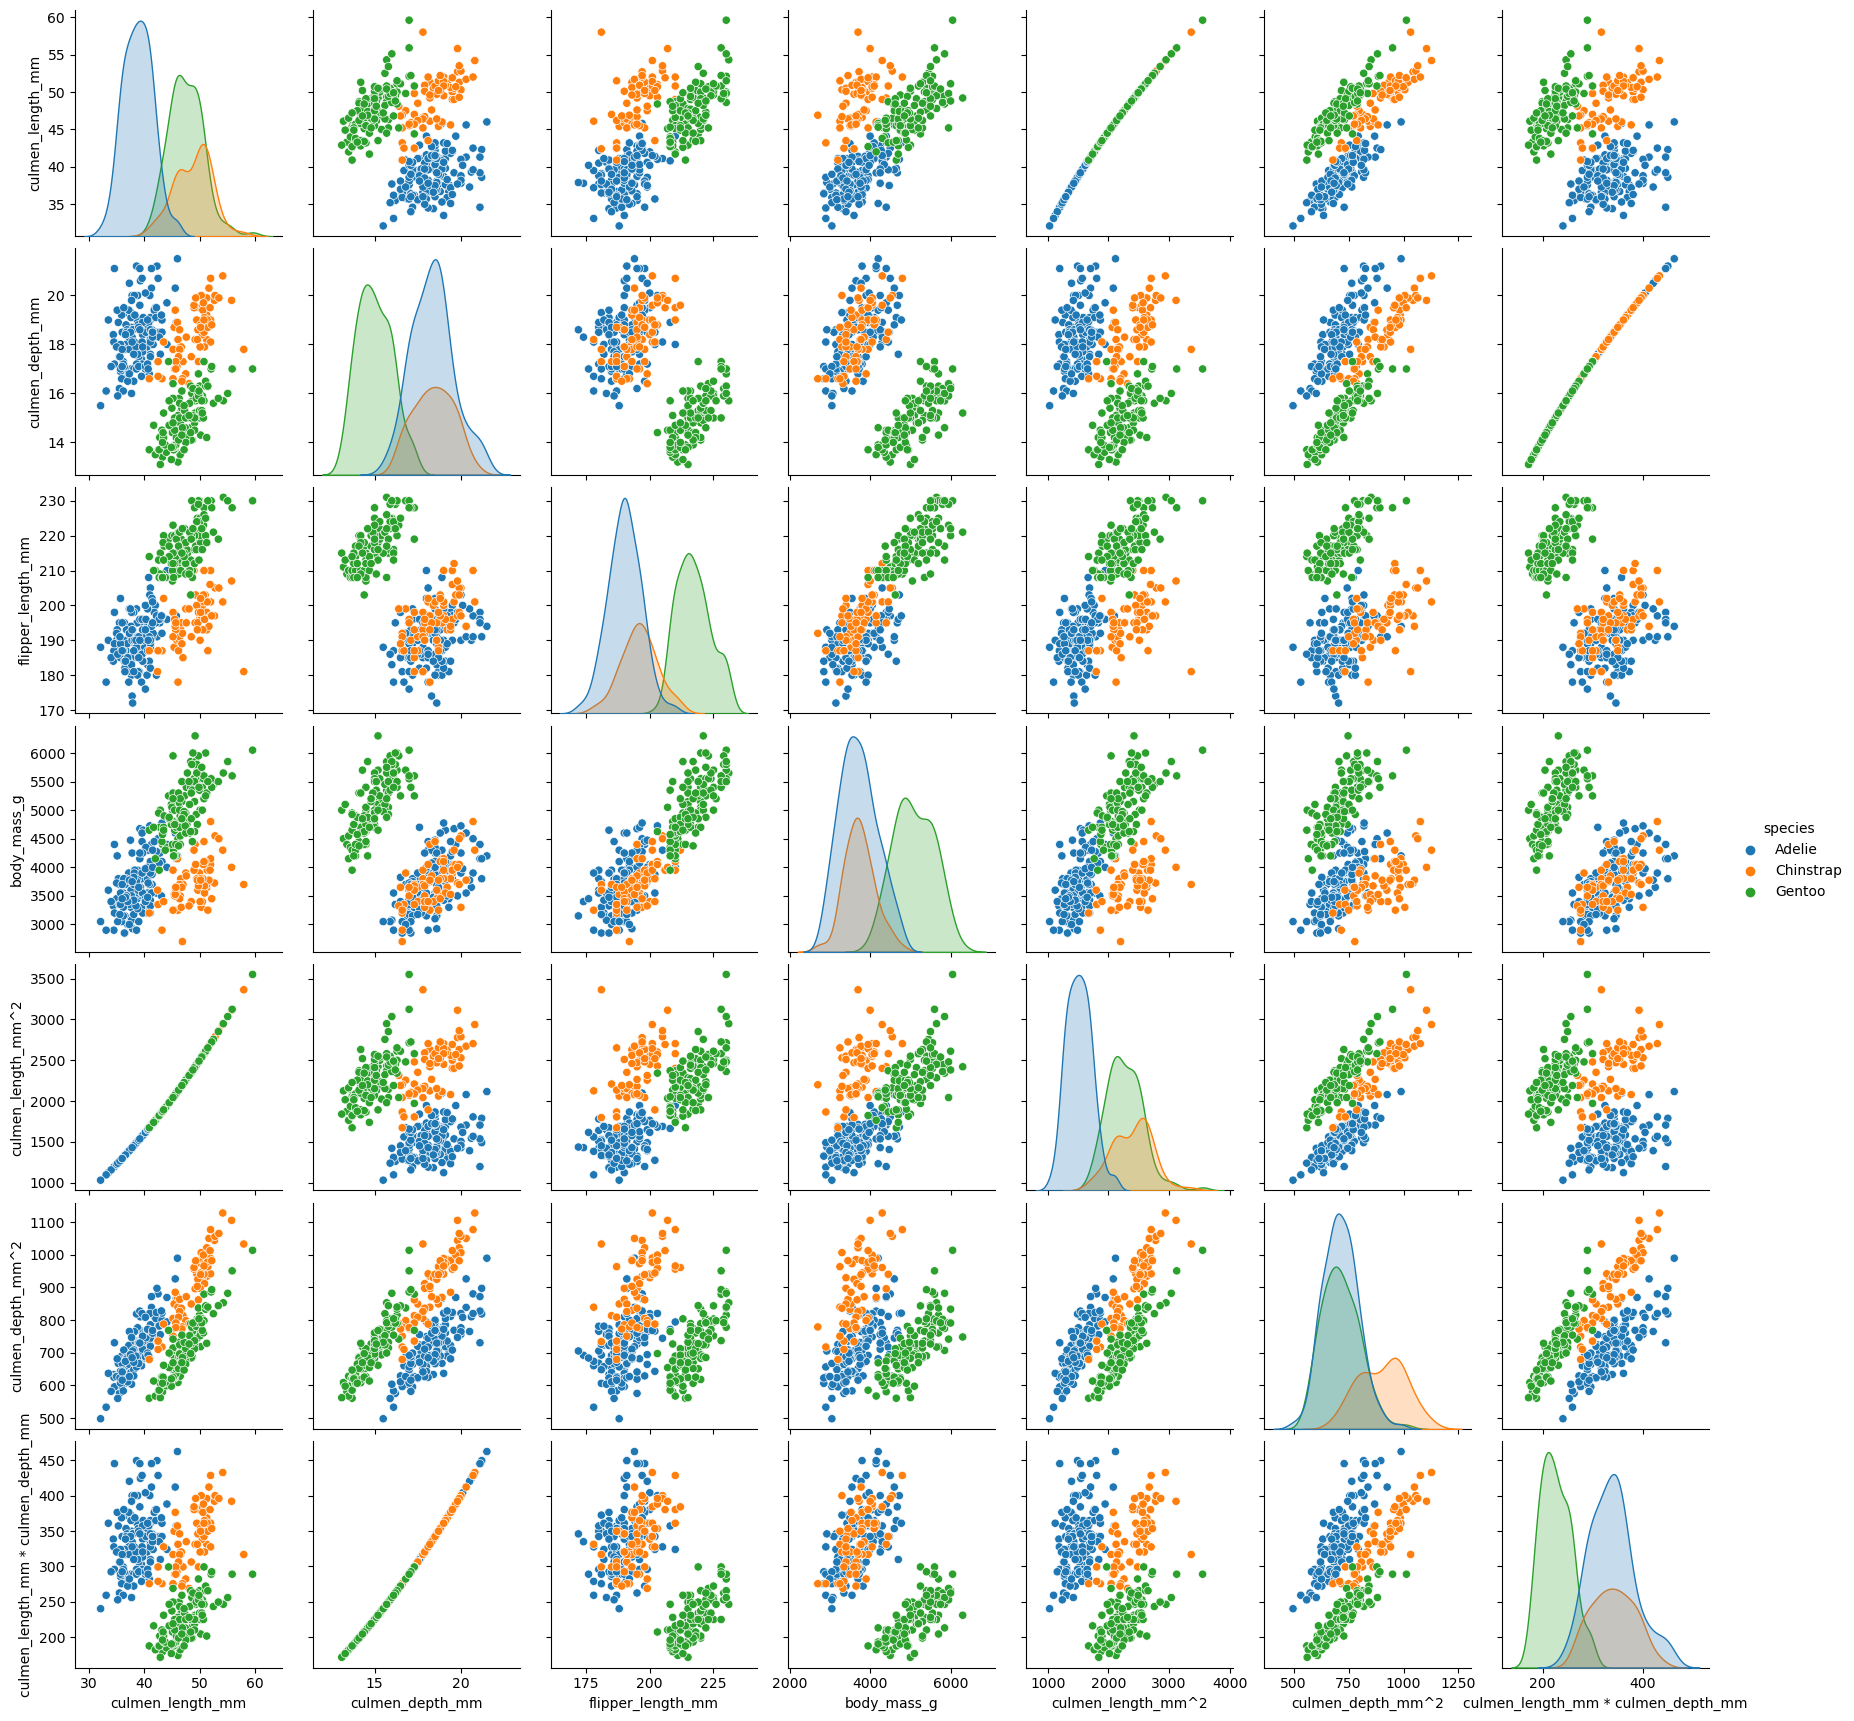

In [14]:
sns.pairplot(df, hue='species')

## binning

binning
- pd.cut(df['column_name'], bins, labels)
    - bins: binの数の指定
    - labels: 返還後のカテゴリのリスト(Falseの場合bin番号を返す)

In [15]:
df['body_mass_g_bin'] = pd.cut(df['body_mass_g'], bins=10, labels=False)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 334 entries, 0 to 343
Data columns (total 11 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   species                             334 non-null    object 
 1   island                              334 non-null    object 
 2   culmen_length_mm                    334 non-null    float64
 3   culmen_depth_mm                     334 non-null    float64
 4   flipper_length_mm                   334 non-null    float64
 5   body_mass_g                         334 non-null    float64
 6   sex                                 334 non-null    object 
 7   culmen_length_mm^2                  334 non-null    float64
 8   culmen_depth_mm^2                   334 non-null    float64
 9   culmen_length_mm * culmen_depth_mm  334 non-null    float64
 10  body_mass_g_bin                     334 non-null    int64  
dtypes: float64(7), int64(1), object(3)
memory usa

## 四則演算

In [17]:
df.columns

Index(['species', 'island', 'culmen_length_mm', 'culmen_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex', 'culmen_length_mm^2',
       'culmen_depth_mm^2', 'culmen_length_mm * culmen_depth_mm',
       'body_mass_g_bin'],
      dtype='object')

In [18]:
df['clumen_diff'] = df['culmen_length_mm'] - df['culmen_depth_mm']
df['clumen_ratio'] = df['culmen_length_mm'] / df['culmen_depth_mm']

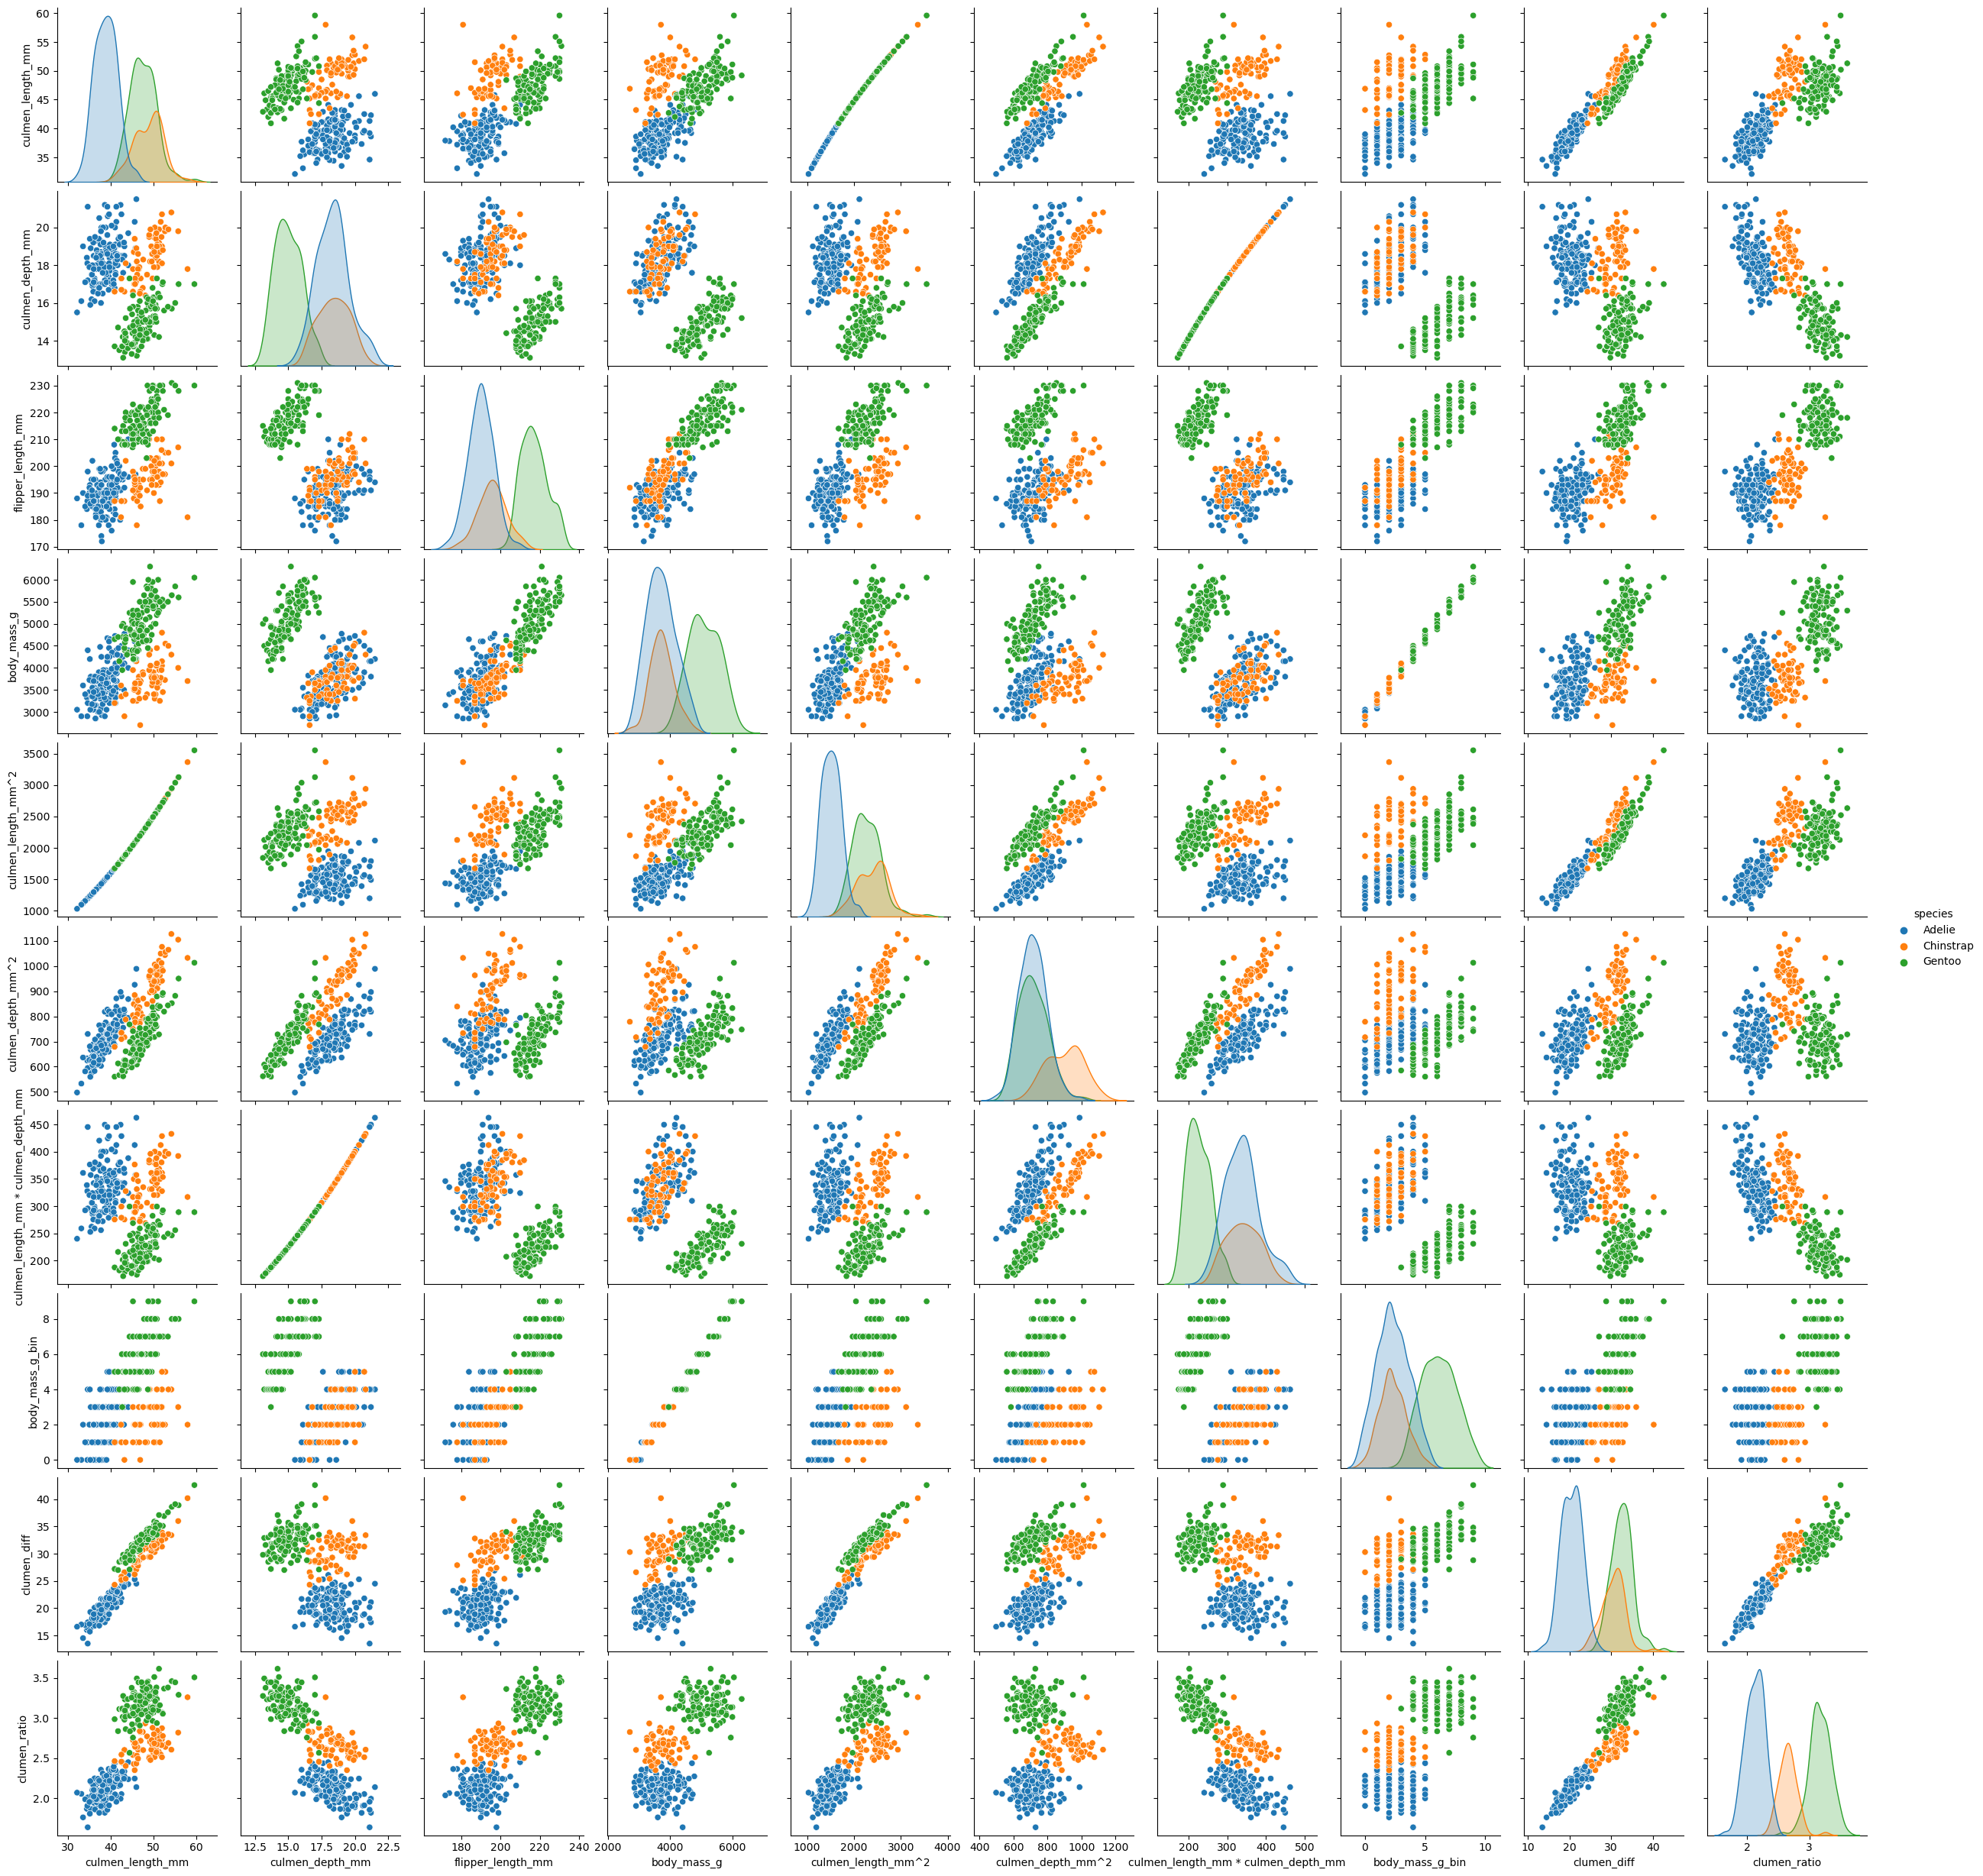

In [19]:
# df['clumen_ratio']は綺麗に分割できており、強力な特徴量になりそう
%matplotlib inline
sns.pairplot(df, hue='species')

## 集約値

In [20]:
df_app = pd.read_csv('homecredit_application.csv')
df_prev_app = pd.read_csv('homecredit_previous_application.csv')

In [21]:
df_app.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        NaN                         NaN  
4                        0.0                         0.0  

[5 rows x 122 columns]

In [22]:
df_prev_app.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     1891648      100373     Consumer loans    10872.990         115695.0   
1     2670402      100077         Cash loans          NaN              0.0   
2     1514511      101011     Consumer loans     6856.065          65866.5   
3     1539382      100425     Consumer loans    13410.270         120357.0   
4     1614986      100151         Cash loans     6535.800          45000.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0    115119.0           11569.5         115695.0                   SATURDAY   
1         0.0               NaN              NaN                  WEDNESDAY   
2     66735.0            6588.0          65866.5                     FRIDAY   
3    133065.0               0.0         120357.0                     FRIDAY   
4     55075.5               NaN          45000.0                  WEDNESDAY   

   HOUR_APPR_PROCESS_START  ...  NAME_SELLER_INDUSTRY  CNT_PAYMENT  \
0                       22  ...              Industry         12.0   
1                       14  ...                   XNA          NaN   
2                       21  ...  Consumer electronics         12.0   
3                       15  ...  Consumer electronics         12.0   
4                       13  ...                   XNA         12.0   

   NAME_YIELD_GROUP          PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0        low_normal  POS household with interest            365243.0   
1               XNA                         Cash                 NaN   
2            middle  POS household with interest            365243.0   
3            middle  POS household with interest            365243.0   
4              high            Cash Street: high            365243.0   

  DAYS_FIRST_DUE DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE DAYS_TERMINATION  \
0        -1013.0                    -683.0         -713.0           -709.0   
1            NaN                       NaN            NaN              NaN   
2         -596.0                    -266.0         -296.0           -289.0   
3         -558.0                    -228.0         -378.0           -351.0   
4        -1011.0                    -681.0         -681.0           -672.0   

  NFLAG_INSURED_ON_APPROVAL  
0                       0.0  
1                       NaN  
2                       0.0  
3                       0.0  
4                       1.0  

[5 rows x 37 columns]

In [23]:
df_prev_app.sort_values(by='SK_ID_CURR')

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
2547     1038818      100002     Consumer loans     9251.775         179055.0   
3507     2396755      100003     Consumer loans     6737.310          68809.5   
1654     1810518      100003         Cash loans    98356.995         900000.0   
2934     2636178      100003     Consumer loans    64567.665         337500.0   
2669     1564014      100004     Consumer loans     5357.250          24282.0   
...          ...         ...                ...          ...              ...   
3245     1542916      101156     Consumer loans     4403.835          16627.5   
1422     2541853      101156         Cash loans    20707.650         405000.0   
2533     2653888      101156         Cash loans    45506.025        1129500.0   
3606     2425247      101156     Consumer loans     2799.720          21055.5   
3053     1211350      101156         Cash loans    18875.835         445500.0   

      AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  \
2547    179055.0               0.0         179055.0   
3507     68053.5            6885.0          68809.5   
1654   1035882.0               NaN         900000.0   
2934    348637.5               0.0         337500.0   
2669     20106.0            4860.0          24282.0   
...          ...               ...              ...   
3245     15457.5            1665.0          16627.5   
1422    405000.0               NaN         405000.0   
2533   1227901.5               NaN        1129500.0   
3606     21951.0            1080.0          21055.5   
3053    445500.0               NaN         445500.0   

     WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  ...  \
2547                   SATURDAY                        9  ...   
3507                   SATURDAY                       15  ...   
1654                     FRIDAY                       12  ...   
2934                     SUNDAY                       17  ...   
2669                     FRIDAY                        5  ...   
...                         ...                      ...  ...   
3245                     MONDAY                       12  ...   
1422                  WEDNESDAY                        8  ...   
2533                     MONDAY                       10  ...   
3606                   THURSDAY                       16  ...   
3053                     FRIDAY                        9  ...   

      NAME_SELLER_INDUSTRY  CNT_PAYMENT  NAME_YIELD_GROUP  \
2547       Auto technology         24.0        low_normal   
3507  Consumer electronics         12.0            middle   
1654                   XNA         12.0        low_normal   
2934             Furniture          6.0            middle   
2669          Connectivity          4.0            middle   
...                    ...          ...               ...   
3245          Connectivity          4.0        low_normal   
1422  Consumer electronics         36.0            middle   
2533                   XNA         36.0        low_action   
3606          Connectivity         12.0              high   
3053          Connectivity         36.0        low_normal   

              PRODUCT_COMBINATION  DAYS_FIRST_DRAWING DAYS_FIRST_DUE  \
2547      POS other with interest            365243.0         -565.0   
3507  POS household with interest            365243.0        -2310.0   
1654             Cash X-Sell: low            365243.0         -716.0   
2934   POS industry with interest            365243.0         -797.0   
2669  POS mobile without interest            365243.0         -784.0   
...                           ...                 ...            ...   
3245     POS mobile with interest            365243.0        -2870.0   
1422          Cash X-Sell: middle            365243.0        -1161.0   
2533             Cash X-Sell: low                 NaN            NaN   
3606     POS mobile with interest            365243.0        -1712.0   
3053             Cash X-Sell: low            365243.0         -564

In [24]:
credit_prev_sum = df_prev_app.groupby('SK_ID_CURR')[['AMT_CREDIT']].sum()

In [25]:
credit_prev_sum.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 952 entries, 100002 to 101156
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   AMT_CREDIT  952 non-null    float64
dtypes: float64(1)
memory usage: 14.9 KB


In [26]:
df_app.join(credit_prev_sum, on='SK_ID_CURR', rsuffix='_PREV_SUM')

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0        100002       1         Cash loans           M            N   
1        100003       0         Cash loans           F            N   
2        100004       0    Revolving loans           M            Y   
3        100006       0         Cash loans           F            N   
4        100007       0         Cash loans           M            N   
..          ...     ...                ...         ...          ...   
995      101152       0         Cash loans           F            N   
996      101153       0         Cash loans           F            N   
997      101154       0         Cash loans           F            Y   
998      101155       0         Cash loans           M            N   
999      101156       0         Cash loans           M            Y   

    FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0                 Y             0          202500.0    406597.5      24700.5   
1                 N             0          270000.0   1293502.5      35698.5   
2                 Y             0           67500.0    135000.0       6750.0   
3                 Y             0          135000.0    312682.5      29686.5   
4                 Y             0          121500.0    513000.0      21865.5   
..              ...           ...               ...         ...          ...   
995               N             0          112500.0    495985.5      17946.0   
996               Y             0          225000.0   1113840.0      57001.5   
997               Y             0          144000.0    517536.0      28206.0   
998               Y             0          315000.0   1288350.0      37800.0   
999               Y             2          180000.0    679500.0      27076.5   

     ...  FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0    ...                 0                0                0   
1    ...                 0                0                0   
2    ...                 0                0                0   
3    ...                 0                0                0   
4    ...                 0                0                0   
..   ...               ...              ...              ...   
995  ...                 0                0                0   
996  ...                 0                0                0   
997  ...                 0                0                0   
998  ...                 0                0                0   
999  ...                 0                0                0   

    AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                          0.0                       0.0   
1                          0.0                       0.0   
2                          0.0                       0.0   
3                          NaN                       NaN   
4                          0.0                       0.0   
..                         ...                       ...   
995                        0.0                       0.0   
996                        0.0                       0.0   
997                        0.0                       0.0   
998                        0.0                       0.0   
999                        0.0                       0.0   

    AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                          0.0                        0.0   
1                          0.0                        0.0   
2                          0.0                        0.0   
3                          NaN                        NaN   
4                          0.0                        0.0   
..                         ...                        ...   
995                        0.0                        0.0   
996                        0.0                        0.0   
997                        0.0                        0.0   
998                        0.0                        1.0   
999                        0.0